In [1]:
import prose
import cabaret
import numpy as np
import matplotlib.pyplot as plt
import os

from astropy.io import fits
from prose import Telescope, FITSImage
from datetime import datetime, timedelta

callisto.telescope differs from builtins (use prose.CONFIG.update_builtins() to update)
io.telescope differs from builtins (use prose.CONFIG.update_builtins() to update)
ganymede.telescope differs from builtins (use prose.CONFIG.update_builtins() to update)
europa.telescope differs from builtins (use prose.CONFIG.update_builtins() to update)
artemis.telescope differs from builtins (use prose.CONFIG.update_builtins() to update)
trappist-south.telescope differs from builtins (use prose.CONFIG.update_builtins() to update)
trappist-north.telescope differs from builtins (use prose.CONFIG.update_builtins() to update)
saint-ex.telescope differs from builtins (use prose.CONFIG.update_builtins() to update)
liverpool.telescope differs from builtins (use prose.CONFIG.update_builtins() to update)
spirit.telescope differs from builtins (use prose.CONFIG.update_builtins() to update)


/opt/anaconda3/envs/semester_project_2/lib/python3.11/site-packages/prose/console_utils.py:15: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
# Parameters
ra, dec = 346.62637500, -5.04346111  # in degrees
exposure_time = 10  # in seconds
base_date = datetime(2024, 1, 1, 0, 0, 0)

generating 100 light images at an exposure time of 10 seconds. 

In [3]:
# Directory to save light images
dir_base_images_light = 'images_generated_light'
os.makedirs(dir_base_images_light, exist_ok=True) # Create directory if it doesn't exist

for i in range(100):
    curr_date = base_date + timedelta(seconds=i*10) # 10 seconds interval between each image
    light = cabaret.generate_image(ra, dec, exposure_time, dateobs=curr_date)
    raw_output_filename = os.path.join(dir_base_images_light, f"raw_image_light_{i+1}.fits")

    # Save the raw image in "images_generated" directory
    fits.writeto(raw_output_filename, light, overwrite=True, header=fits.Header([
        (Telescope.keyword_image_type, Telescope.keyword_light_images),
        (Telescope.keyword_observation_date, curr_date.strftime('%Y-%m-%dT%H:%M:%S.%f'))
    ]))

Querying Gaia for sources...
Found 59 sources (user set limit of 2000).
Querying Gaia for sources...
Found 59 sources (user set limit of 2000).
Querying Gaia for sources...
Found 59 sources (user set limit of 2000).
Querying Gaia for sources...
Found 59 sources (user set limit of 2000).
Querying Gaia for sources...
Found 59 sources (user set limit of 2000).
Querying Gaia for sources...
Found 59 sources (user set limit of 2000).
Querying Gaia for sources...
Found 59 sources (user set limit of 2000).
Querying Gaia for sources...
Found 59 sources (user set limit of 2000).
Querying Gaia for sources...
Found 59 sources (user set limit of 2000).
Querying Gaia for sources...
Found 59 sources (user set limit of 2000).
Querying Gaia for sources...
Found 59 sources (user set limit of 2000).
Querying Gaia for sources...
Found 59 sources (user set limit of 2000).
Querying Gaia for sources...
Found 59 sources (user set limit of 2000).
Querying Gaia for sources...
Found 59 sources (user set limit of

generating 100 dark images at an exposure time of 10 seconds. 

In [4]:
# Directory to save dark images
dir_base_images_dark = 'images_generated_dark'
os.makedirs(dir_base_images_dark, exist_ok=True) # Create directory if it doesn't exist

for i in range(5):
    curr_date += timedelta(seconds=i*10) # 10 seconds interval between each image
    dark = cabaret.generate_image(ra, dec, exposure_time, light=0, dateobs=curr_date)
    raw_output_filename = os.path.join(dir_base_images_dark, f"raw_image_dark_{i+1}.fits")

    # Save the raw image in "images_generated" directory
    fits.writeto(raw_output_filename, dark, overwrite=True, header=fits.Header([
    (Telescope.keyword_image_type, Telescope.keyword_dark_images),
    (Telescope.keyword_observation_date, curr_date.strftime('%Y-%m-%dT%H:%M:%S.%f'))
    ]))

combine all images into a new directory for prose

In [5]:
import shutil

# Directory to save all images
dir_base_images_all = 'images_generated_all'
os.makedirs(dir_base_images_all, exist_ok=True)  # Create directory if it doesn't exist

# Copy contents of 'images_generated_dark' and 'images_generated_light' into 'images_generated_all'

for filename in os.listdir(dir_base_images_dark):
    shutil.copy(os.path.join(dir_base_images_dark, filename), dir_base_images_all)

for filename in os.listdir(dir_base_images_light):
    shutil.copy(os.path.join(dir_base_images_light, filename), dir_base_images_all)

Use FitsManager

In [6]:
from prose import FitsManager, Sequence, blocks

In [9]:
fm = FitsManager("./images_generated_all", depth=1)
ref = FITSImage(fm.all_images[0])

Parsing FITS: 100%|██████████| 105/105 [00:00<00:00, 2746.54it/s]

INFO telescope  not found - using default


array([PointSource(a=11.370015040418526, b=11.073259728563224, orientation=0.09685566961514214, coords=array([485.79574753, 523.96212243]), peak=30510.0, i=0, discarded=False),
       PointSource(a=8.488904124724284, b=8.352457607408319, orientation=1.4936705017353813, coords=array([ 44.78881244, 952.8576022 ]), peak=7974.0, i=1, discarded=False),
       PointSource(a=7.767634771038917, b=7.578158880308746, orientation=1.4430740893530738, coords=array([267.51963809, 468.43186854]), peak=4826.0, i=2, discarded=False),
       PointSource(a=6.133471835126797, b=5.858555454037871, orientation=2.9932278490431923, coords=array([274.43271037, 974.76479777]), peak=1908.0, i=3, discarded=False),
       PointSource(a=5.9814760326033705, b=5.535160910550213, orientation=2.3918743535323705, coords=array([678.84511527, 433.22503224]), peak=1887.0, i=4, discarded=False),
       PointSource(a=5.658288372777857, b=5.4573597518003165, orientation=1.8011114386784062, coords=array([673.37516052, 795.5220

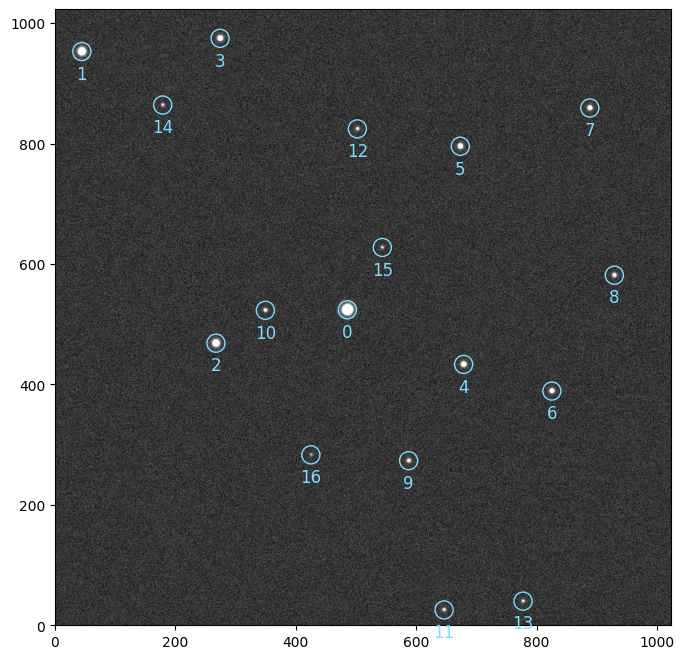

In [13]:
calibration = Sequence(
    [
        blocks.Calibration(darks=fm.all_darks, bias=fm.all_bias, flats=fm.all_flats),
        blocks.Trim(),
        blocks.PointSourceDetection(),  # stars detection
        blocks.Cutouts(21),  # making stars cutouts
        blocks.MedianEPSF(),  # building PSF
        blocks.psf.Moffat2D(),  # modeling PSF
    ]
)

calibration.run([ref], show_progress=False)

ref.show()
ref.sources

In [16]:
radii = np.linspace(0.2, 4, 30)

photometry = Sequence(
    [
        *calibration,  # calibration
        blocks.ComputeTransformTwirl(ref),  # compute alignment
        blocks.AlignReferenceSources(ref),  # alignment
        blocks.CentroidQuadratic(),  # centroiding
        blocks.AperturePhotometry(),  # aperture photometry
        blocks.AnnulusBackground(),  # local background estimate
        blocks.GetFluxes(),
    ]
)
photometry.run(fm.all_images, loader=FITSImage)

100%|██████████| 100/100 [00:12<00:00,  8.22images/s]


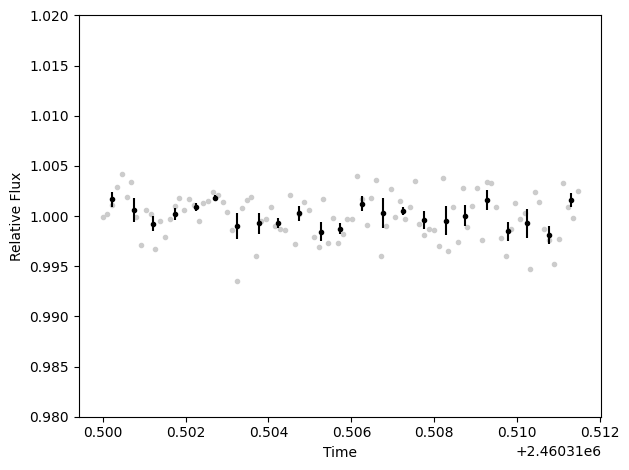

In [22]:
raw_fluxes = photometry[-1].fluxes

# picking target
raw_fluxes.target = 0

# good practice
raw_fluxes = raw_fluxes.sigma_clipping_data(bkg=3)

# differential photometry
diff_fluxes = raw_fluxes.autodiff()
diff_fluxes.plot()
diff_fluxes.bin(0.0005, True).errorbar()

plt.ylim(0.98, 1.02)
plt.xlabel("Time")
plt.ylabel("Relative Flux")
plt.tight_layout()

I have a few questions. What's the time gap between two successive images? Do we need flats biases and darks 

see google drive, table 2 of the paper on slack, dark current lot ihgher. sky background will be higher = 1000
pitchfloat=12. 0.3 arcsec for pixel look at portal and see the fwhm thingy
download json file see environment and see fwhm. and seeing also there and dont need to do any maths or multiplication
sky level pe maths karna hoga. ye cabaret pe kahi to hai. tkae these numbners as the variablilty and scale it by dividing by 1000 as a scale factor.
seeing sky level and pixel shift

Bad Pixels \
Metric that quantifies the distribution of bad pixels

In [23]:
fm

,date,telescope,filter,type,target,width,height,files
id,,,,,,,,
2,2023-12-31,,,dark,,1024,1024,5
1,2023-12-31,,,light,,1024,1024,100
